In [1]:
import numpy as np
import matplotlib.pyplot as plt
from analysis.analysis import Txt_Reading
import pandas as pd
import os
from tqdm.notebook import tqdm as tqdm

%matplotlib inline

In [ ]:
folder = "10nM"
f_MAX = [10, 15, 20, 25, 30, 35]
f_max = 10
reading = Txt_Reading(folder, f_max)

100%|██████████| 4/4 [00:00<00:00, 333.38it/s]

All trajectories have already been categorized


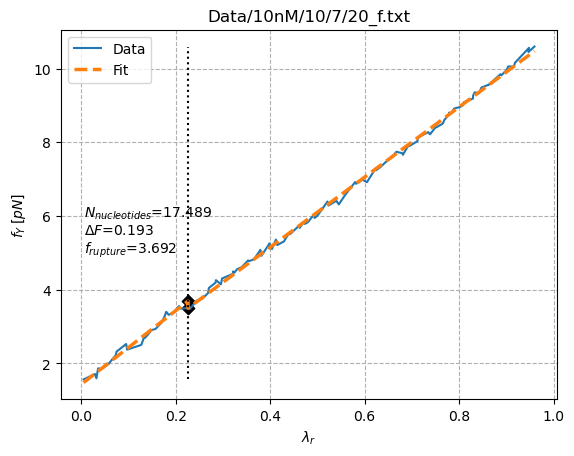

In [3]:
file = reading.readTxt(number=7, N=20, ty='f', graph=True)

In [4]:
reading.params_df

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,k_eff,t_0,λ_0,a_pre,b_pre,a_post,b_post,N_fits
0,3.691699,3.498759,4.994693,17.489482,0.048298,2.38867,0.226097,9.989799,1.433034,9.509039,1.348793,2


In [5]:
# plt.plot(reading.λ[:600], reading.force_Y[:600])
# plt.scatter(reading.λ_0, reading.f_rupture, marker="^", c="red")
# plt.scatter(reading.λ[(reading.index+1)[0]], reading.f_rupture_next, marker="v", c="orange", s=1000);

In [6]:
reading.f_rupture, reading.f_rupture_next

([3.691699436308424], [3.4987594577866235])

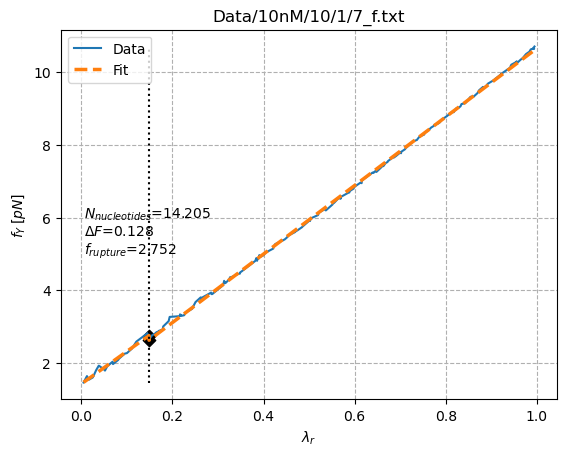

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,k_eff,t_0,λ_0,a_pre,b_pre,a_post,b_post,N_fits
0,2.751798,2.624213,3.438693,14.204744,0.048378,1.97949,0.148549,8.950938,1.422145,9.430097,1.223382,2


In [7]:
file = reading.readTxt(number=1, N=7, ty='f', graph=True)
reading.params_df

In [8]:
# Columns: CycleCount, X_force,	Y_force, Z_force, time(sec), Status, λ

In [9]:
# molecules, all_molecules_f, all_molecules_u = reading.seq_analysis_post_meta()
res = np.load(f'res/{folder}/f_max{f_max}.npz', allow_pickle=True)
molecules = res['molecules']
all_molecules_u = res['all_molecules_u']
all_molecules_f = res['all_molecules_f']

In [10]:
# np.savez('res/10nM/prova/res.npz', 
#          molecules=molecules,
#          all_molecules_u=all_molecules_u,
#          all_molecules_f=all_molecules_f, )

self.params = self.f_rupture + self.f_rupture_next + self.x_ssDNA + self.N_nucleotides + self.t_0 + self.λ_0 + self.popt_pre + self.popt_post + [self.N_fits]

This should be changed to a python dictionary or something else

In [11]:
keys = ['f_rupture', 'f_rupture_next', 'x_ssDNA', 'N', 'k_eff', 't_0', 'fileName']
# Create a dictionary with the data
data = {}
for ii, molecule in enumerate(molecules):
    U_dict = {}
    F_dict = {}
    
    for jj, el in enumerate(all_molecules_u[ii]):
        U_dict[jj+1] = dict(zip(keys, el[0]))
    
    for jj, el in enumerate(all_molecules_f[ii]):
        F_dict[jj+1] = dict(zip(keys, el[0]))
    
    data[molecule] = {'U': U_dict, 'F': F_dict}

In [12]:
data[molecules[-1]]['U']#['N']

{1: {'f_rupture': 5.508760361728741,
  'f_rupture_next': 4.913633562035877,
  'x_ssDNA': 15.686943394029882,
  'N': 46.01042918693785,
  'k_eff': 0.041287649191492616,
  't_0': -2.348569999999995,
  'fileName': 'Data/10nM/10/16/1_u.txt'},
 2: {'f_rupture': 2.8597985019924628,
  'f_rupture_next': 2.0986751354378463,
  'x_ssDNA': 15.509565189428429,
  'N': 62.58763570110174,
  'k_eff': 0.05183676666286277,
  't_0': 2.398040000000009,
  'fileName': 'Data/10nM/10/16/2_u.txt'},
 3: {'f_rupture': 0,
  'f_rupture_next': 0,
  'x_ssDNA': 0,
  'N': 0,
  'k_eff': 0,
  't_0': 6.8466999999999985,
  'fileName': 'Data/10nM/10/16/3_u.txt'},
 4: {'f_rupture': 0,
  'f_rupture_next': 0,
  'x_ssDNA': 0,
  'N': 0,
  'k_eff': 0,
  't_0': 11.149050000000017,
  'fileName': 'Data/10nM/10/16/4_u.txt'},
 5: {'f_rupture': 0,
  'f_rupture_next': 0,
  'x_ssDNA': 0,
  'N': 0,
  'k_eff': 0,
  't_0': 15.606459999999998,
  'fileName': 'Data/10nM/10/16/5_u.txt'},
 6: {'f_rupture': 0,
  'f_rupture_next': 0,
  'x_ssDNA': 

In [13]:
metaFile = np.loadtxt(f'meta/10nM/{f_max}/jumps.txt', dtype=str)

In [14]:
N_U = {
    molecule: {
        key: value['N'] for key, value in data[molecule]['U'].items() if value['fileName'] in metaFile
        } 
    for molecule in molecules}
N_F = {
    molecule: {
        key: value['N'] for key, value in data[molecule]['F'].items() if value['fileName'] in metaFile
        } 
    for molecule in molecules}

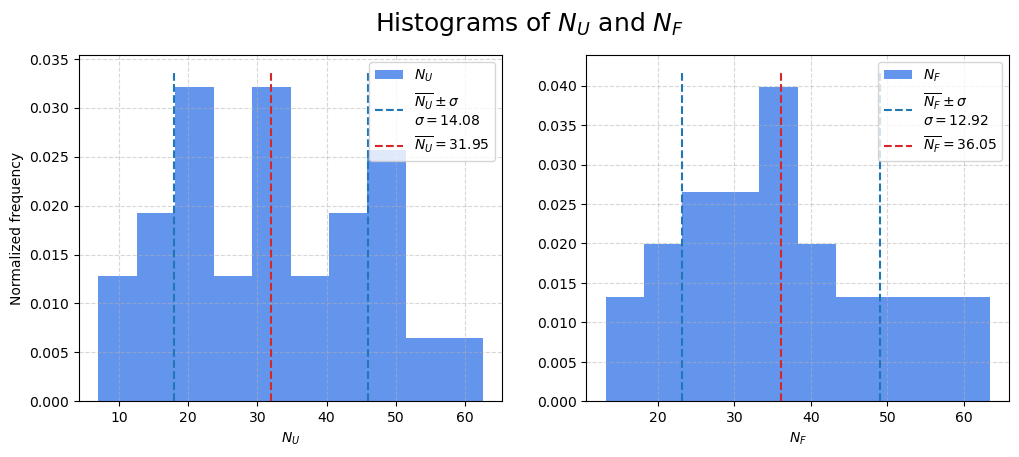

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
to_plot = [
    np.array([value['N'] for molecule in molecules for _, value in data[molecule]['U'].items() if value['fileName'] in metaFile]), 
    np.array([value['N'] for molecule in molecules for _, value in data[molecule]['F'].items() if value['fileName'] in metaFile])
]
labels = ['N_U', 'N_F']
for ii in range(2):
    ax[ii].hist(to_plot[ii], bins=10, density=True,
                color='cornflowerblue', label=fr'${labels[ii]}$')
    y_lim = ax[ii].get_ylim()
    ax[ii].vlines(np.mean(to_plot[ii][to_plot[ii] != 0])+np.std(to_plot[ii][to_plot[ii] != 0]), 
                  *y_lim, color='tab:blue', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}\pm \sigma$'+f'\n'+fr'$\sigma={np.std(to_plot[ii][to_plot[ii] != 0]):.2f}$')
    ax[ii].vlines(np.mean(to_plot[ii][to_plot[ii] != 0])-np.std(to_plot[ii]), 
                  *y_lim, color='tab:blue', ls='--', label=None)
    ax[ii].vlines(np.mean(to_plot[ii][to_plot[ii] != 0]), 
                  *y_lim, color='tab:red', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}=$'+f'{np.mean(to_plot[ii][to_plot[ii] != 0]):.2f}')
    ax[ii].set_xlabel(fr'${labels[ii]}$')
    ax[ii].set_ylabel(r'Normalized frequency') if ii == 0 else None
    ax[ii].grid(ls='--', alpha=0.5)
    ax[ii].legend(loc='best')
plt.suptitle(r'Histograms of $N_U$ and $N_F$', fontsize=18)
plt.show()

In [16]:
# Compute the percentage of elements outside the [mean-std, mean+std] confidence interval
failed_U = np.sum((to_plot[0] < np.mean(to_plot[0])-np.std(to_plot[0])) | (to_plot[0] > np.mean(to_plot[0])+np.std(to_plot[0])))/len(to_plot[0]) * 100
failed_F = np.sum((to_plot[1] < np.mean(to_plot[1])-np.std(to_plot[1])) | (to_plot[1] > np.mean(to_plot[1])+np.std(to_plot[1])))/len(to_plot[1]) * 100
print(f'Outliers in U: {failed_U:.2f}%\nOutliers in F: {failed_F:.2f}%')

Outliers in U: 35.71%
Outliers in F: 36.67%


In [17]:
# See an example of the failed_U trajectory
failed_U_dict = {}
failed_F_dict = {}

for mol, sub_dic in data.items():
    failed = []
    for key, values in sub_dic['U'].items():
        if values['N'] < np.mean(
            to_plot[0])-np.std(to_plot[0]) or values['N'] > np.mean(
                to_plot[0])+np.std(to_plot[0]) and values['fileName'] in metaFile: 
            failed.append(values['fileName']) 
    if failed:
        failed_U_dict[mol] = failed

for mol, sub_dic in data.items():
    failed = []
    for key, values in sub_dic['F'].items():
        if values['N'] < np.mean(
            to_plot[1])-np.std(to_plot[1]) or values['N'] > np.mean(
                to_plot[1])+np.std(to_plot[1]) and values['fileName'] in metaFile: 
            failed.append(values['fileName']) 
    if failed:
        failed_F_dict[mol] = failed

In [18]:
number_of_failed_anaylys_U = sum([len(sub_dic) for sub_dic in failed_U_dict.values()])
number_of_failed_anaylys_F = sum([len(sub_dic) for sub_dic in failed_F_dict.values()])

In [19]:
print(f'Percentage of outliers U (looking only at the # of nucleotides): {number_of_failed_anaylys_U/len(to_plot[0]) * 100:.2f}%')
print(f'Percentage of outliers F (looking only at the # of nucleotides): {number_of_failed_anaylys_F/len(to_plot[1]) * 100:.2f}%')

Percentage of outliers U (looking only at the # of nucleotides): 932.14%
Percentage of outliers F (looking only at the # of nucleotides): 863.33%


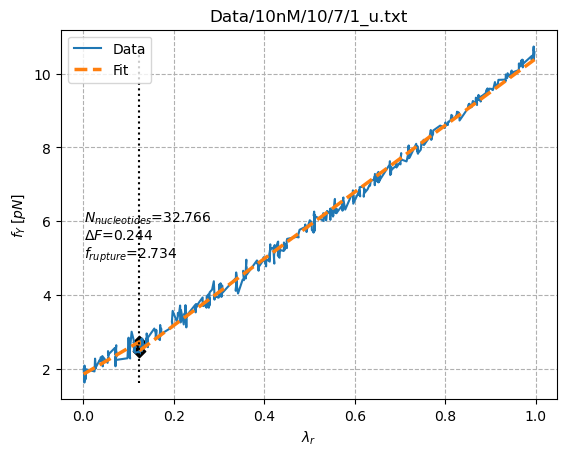

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,k_eff,t_0,λ_0,a_pre,b_pre,a_post,b_post,N_fits
0,2.734042,2.489546,7.900495,32.765969,0.034421,0.09571,0.123717,7.115111,1.853783,9.035132,1.371747,2


In [20]:
file = reading.readTxt(number=7, N=1, ty='u', forced_reshaped=0, graph=True) # 10 reshape works best
reading.params_df

In [21]:
mean_N_U = np.mean(to_plot[0][to_plot[0] != 0])
std_N_U = np.std(to_plot[0][to_plot[0] != 0])
mean_N_F = np.mean(to_plot[1][to_plot[1] != 0])
std_N_F = np.std(to_plot[1][to_plot[1] != 0])

# outliers_U = np.where(np.abs(N_U - mean_N_U) > std_N_U)[0]
# outliers_F = np.where(np.abs(N_F - mean_N_F) > std_N_F)[0]

outliers_U = {
    molecule: {
        value['fileName']: value['N'] for value in data[molecule]['U'].values() 
        if (value['N'] > 70 or value['N'] < 30) and value['fileName'] in metaFile
        } for molecule in molecules}
outliers_F = {
    molecule: {
        value['fileName']: value['N'] for value in data[molecule]['F'].values() 
        if (value['N'] > 70 or value['N'] < 30) and value['fileName'] in metaFile
        } for molecule in molecules}

In [22]:
path_re_analyze_U = [traj for molecule in outliers_U.keys() for traj in outliers_U[molecule].keys()]
path_re_analyze_F = [traj for molecule in outliers_F.keys() for traj in outliers_F[molecule].keys()]

In [23]:
len(path_re_analyze_U), len(path_re_analyze_F)

(13, 11)

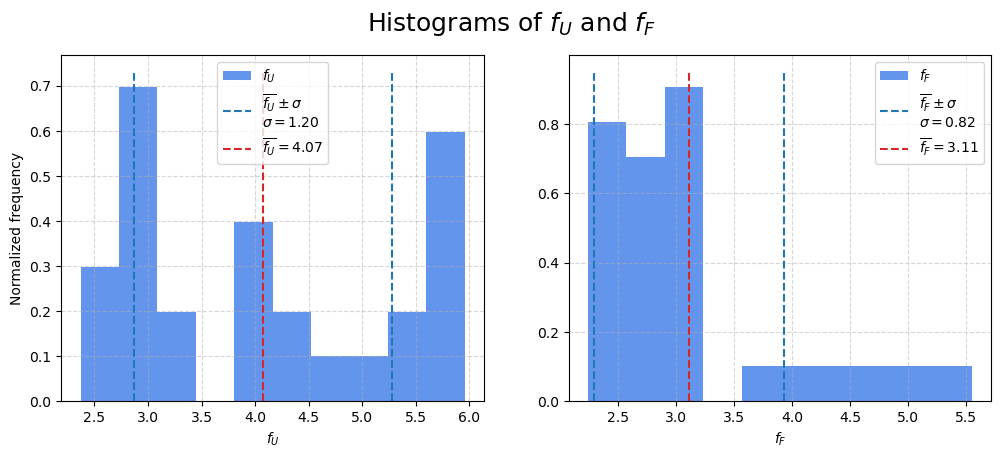

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
to_plot_f_rupture = [
    np.array([value['f_rupture'] for molecule in molecules 
              for _, value in data[molecule]['U'].items() 
              if value['fileName'] in metaFile]), 
    np.array([value['f_rupture'] for molecule in molecules 
              for _, value in data[molecule]['F'].items()
              if value['fileName'] in metaFile])
]
labels = ['f_U', 'f_F']
for ii in range(2):
    ax[ii].hist(to_plot_f_rupture[ii], bins=10, density=True,
                color='cornflowerblue', label=fr'${labels[ii]}$')
    y_lim = ax[ii].get_ylim()
    ax[ii].vlines(np.mean(to_plot_f_rupture[ii][to_plot_f_rupture[ii] != 0])+np.std(to_plot_f_rupture[ii][to_plot_f_rupture[ii] != 0]), 
                  *y_lim, color='tab:blue', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}\pm \sigma$'+f'\n'+fr'$\sigma={np.std(to_plot_f_rupture[ii][to_plot_f_rupture[ii] != 0]):.2f}$')
    ax[ii].vlines(np.mean(to_plot_f_rupture[ii][to_plot_f_rupture[ii] != 0])-np.std(to_plot_f_rupture[ii]), 
                  *y_lim, color='tab:blue', ls='--', label=None)
    ax[ii].vlines(np.mean(to_plot_f_rupture[ii][to_plot_f_rupture[ii] != 0]), 
                  *y_lim, color='tab:red', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}=$'+f'{np.mean(to_plot_f_rupture[ii][to_plot_f_rupture[ii] != 0]):.2f}')
    ax[ii].set_xlabel(fr'${labels[ii]}$')
    ax[ii].set_ylabel(r'Normalized frequency') if ii == 0 else None
    ax[ii].grid(ls='--', alpha=0.5)
    ax[ii].legend(loc='best')
plt.suptitle(r'Histograms of $f_U$ and $f_F$', fontsize=18)
plt.show()

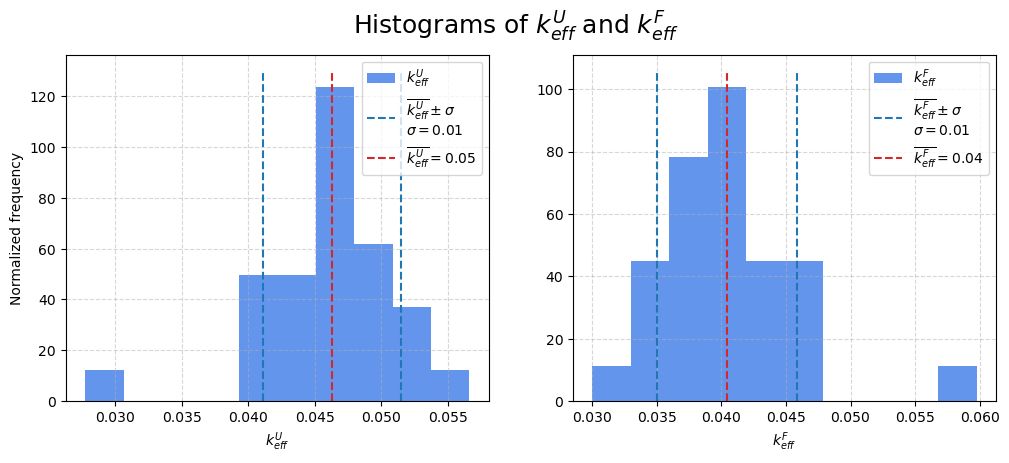

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
to_plot_k_eff = [
    np.array([value['k_eff'] for molecule in molecules 
              for _, value in data[molecule]['U'].items() 
              if value['fileName'] in metaFile]), 
    np.array([value['k_eff'] for molecule in molecules 
              for _, value in data[molecule]['F'].items()
              if value['fileName'] in metaFile])
]
labels = ['k_{eff}^U', 'k_{eff}^F']
for ii in range(2):
    ax[ii].hist(to_plot_k_eff[ii], bins=10, density=True,
                color='cornflowerblue', label=fr'${labels[ii]}$')
    y_lim = ax[ii].get_ylim()
    ax[ii].vlines(np.mean(to_plot_k_eff[ii][to_plot_k_eff[ii] != 0])+np.std(to_plot_k_eff[ii][to_plot_k_eff[ii] != 0]), 
                  *y_lim, color='tab:blue', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}\pm \sigma$'+f'\n'+fr'$\sigma={np.std(to_plot_k_eff[ii][to_plot_k_eff[ii] != 0]):.2f}$')
    ax[ii].vlines(np.mean(to_plot_k_eff[ii][to_plot_k_eff[ii] != 0])-np.std(to_plot_k_eff[ii]), 
                  *y_lim, color='tab:blue', ls='--', label=None)
    ax[ii].vlines(np.mean(to_plot_k_eff[ii][to_plot_k_eff[ii] != 0]), 
                  *y_lim, color='tab:red', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}=$'+f'{np.mean(to_plot_k_eff[ii][to_plot_k_eff[ii] != 0]):.2f}')
    ax[ii].set_xlabel(fr'${labels[ii]}$')
    ax[ii].set_ylabel(r'Normalized frequency') if ii == 0 else None
    ax[ii].grid(ls='--', alpha=0.5)
    ax[ii].legend(loc='best')
plt.suptitle(r'Histograms of $k_{eff}^U$ and $k_{eff}^F$', fontsize=18)
plt.show()

In [26]:
from sklearn.cluster import KMeans

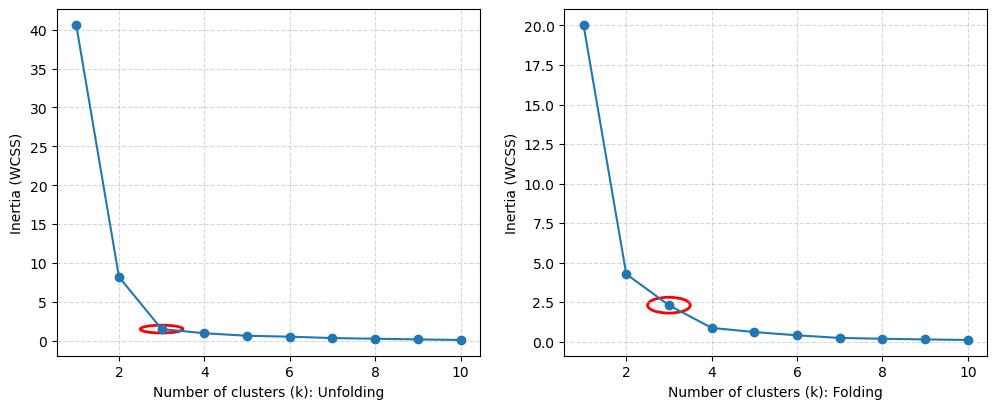

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
lab = ['Unfolding', 'Folding']
for ii in range(2):
    inertia = []
    k_values = range(1, 11)
    X = np.concatenate((to_plot_f_rupture[ii].reshape(-1, 1),
                        to_plot_k_eff[ii].reshape(-1, 1)), axis=1)
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
        inertia.append(kmeans.inertia_)
    ax[ii].plot(k_values, inertia, marker='o')
    ax[ii].set_xlabel(f'Number of clusters (k): {lab[ii]}')
    ax[ii].set_ylabel('Inertia (WCSS)')
    ax[ii].grid(ls='--', alpha=0.5)
    elbow_k = 3
    elbow_inertia = inertia[elbow_k-1]
    circle = plt.Circle((elbow_k, elbow_inertia), radius=0.5, 
                        color='red', fill=False, linewidth=2)
    ax[ii].add_patch(circle)

plt.show()

In [28]:
kmeans = KMeans(n_clusters=elbow_k, random_state=42)

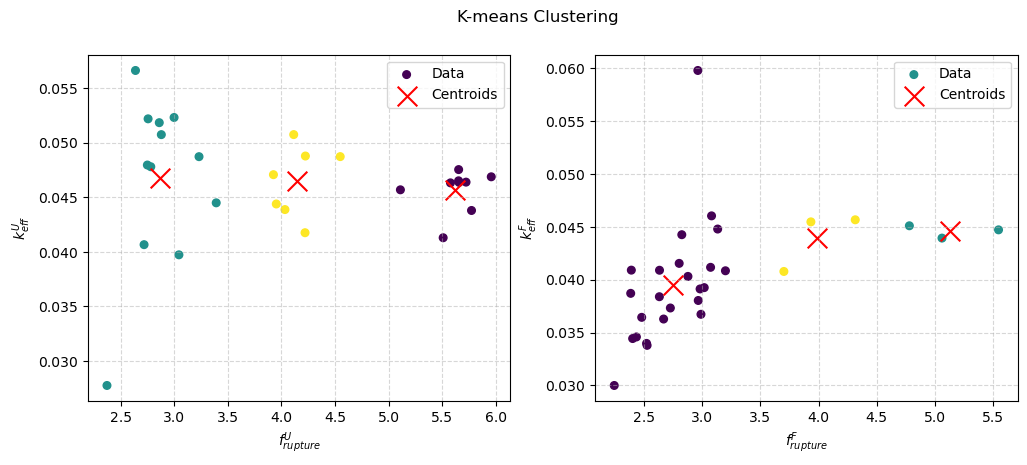

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
lab = ['U', 'F']
for ii in range(2):
    X = np.concatenate((to_plot_f_rupture[ii].reshape(-1, 1), 
                        to_plot_k_eff[ii].reshape(-1, 1)), axis=1)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    ax[ii].scatter(X[:, 0], X[:, 1], s=30, c=labels, 
                cmap='viridis', label='Data')
    ax[ii].scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')
    ax[ii].set_xlabel('$f_{rupture}^{'+lab[ii]+'}$')
    ax[ii].set_ylabel("$k_{eff}^{"+lab[ii]+'}$')
    ax[ii].grid(ls='--', alpha=0.5)
    ax[ii].legend(loc='best')
plt.suptitle("K-means Clustering")
plt.show()

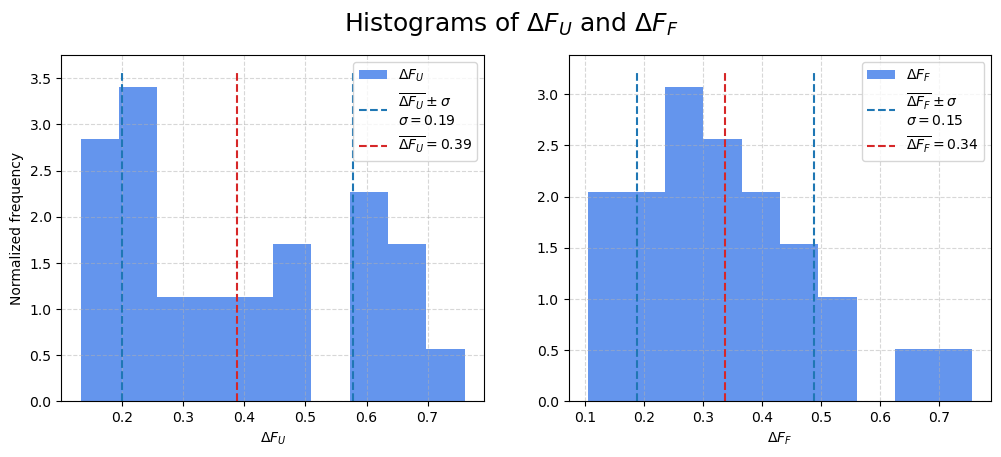

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
to_plot_deltaF = [
    np.array([abs(value['f_rupture_next'] - value['f_rupture']) for molecule in molecules 
              for _, value in data[molecule]['U'].items() 
              if value['fileName'] in metaFile]), 
    np.array([abs(value['f_rupture_next'] - value['f_rupture']) for molecule in molecules 
              for _, value in data[molecule]['F'].items()
              if value['fileName'] in metaFile])
]
labels = ['\Delta F_{U}', '\Delta F_{F}']
for ii in range(2):
    ax[ii].hist(to_plot_deltaF[ii], bins=10, density=True,
                color='cornflowerblue', label=fr'${labels[ii]}$')
    y_lim = ax[ii].get_ylim()
    ax[ii].vlines(np.mean(to_plot_deltaF[ii][to_plot_deltaF[ii] != 0])+np.std(to_plot_deltaF[ii][to_plot_deltaF[ii] != 0]), 
                  *y_lim, color='tab:blue', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}\pm \sigma$'+f'\n'+fr'$\sigma={np.std(to_plot_deltaF[ii][to_plot_deltaF[ii] != 0]):.2f}$')
    ax[ii].vlines(np.mean(to_plot_deltaF[ii][to_plot_deltaF[ii] != 0])-np.std(to_plot_deltaF[ii]), 
                  *y_lim, color='tab:blue', ls='--', label=None)
    ax[ii].vlines(np.mean(to_plot_deltaF[ii][to_plot_deltaF[ii] != 0]), 
                  *y_lim, color='tab:red', ls='--', 
                  label=r'$\overline{'+f'{labels[ii]}'+r'}=$'+f'{np.mean(to_plot_deltaF[ii][to_plot_deltaF[ii] != 0]):.2f}')
    ax[ii].set_xlabel(fr'${labels[ii]}$')
    ax[ii].set_ylabel(r'Normalized frequency') if ii == 0 else None
    ax[ii].grid(ls='--', alpha=0.5)
    ax[ii].legend(loc='best')
plt.suptitle(r'Histograms of $\Delta F_{U}$ and $\Delta F_{F}$', fontsize=18)
plt.show()

In [31]:
# reading.readTxt(number=8, N=10, ty='u', forced_reshaped=0, graph=True)

In [32]:
fileNumb = -1

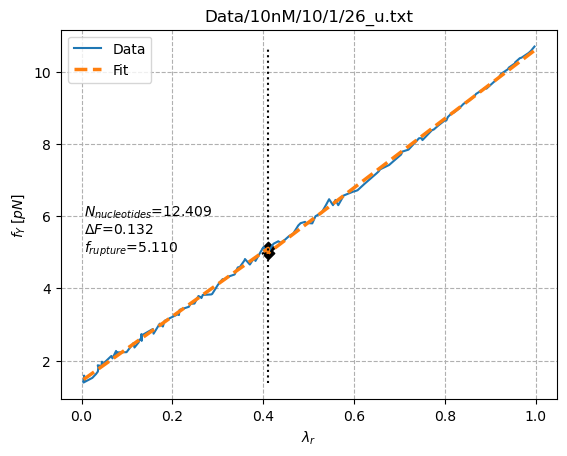

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   5.109774        4.977978  4.108639      12.409025  0.06348  0.410656   

      a_pre    b_pre    a_post    b_post  N_fits  
0  8.947058  1.43561  9.586004  1.041426       2  


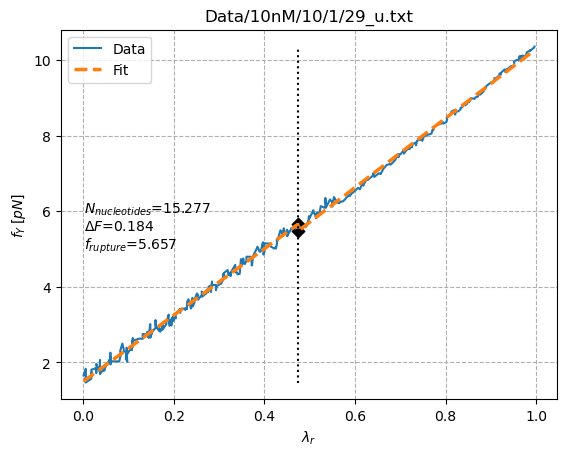

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides     t_0       λ_0  \
0   5.656994        5.472894  5.260476      15.276665  0.2251  0.474075   

      a_pre     b_pre   a_post   b_post  N_fits  
0  8.778018  1.495553  9.16866  1.12626       2  


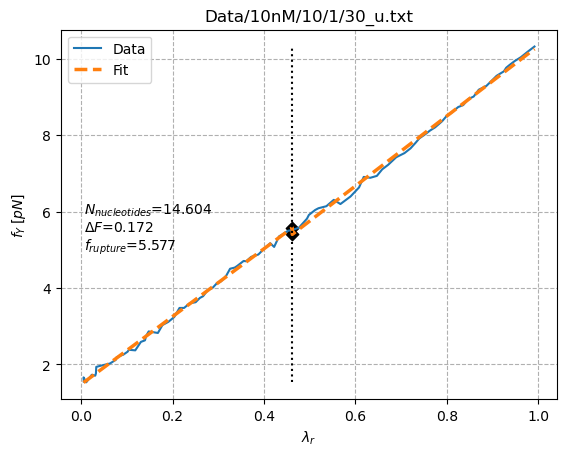

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   5.576892        5.404519  5.002126      14.603737  0.05274  0.461718   

      a_pre     b_pre    a_post    b_post  N_fits  
0  8.864512  1.483986  9.153274  1.178287       2  


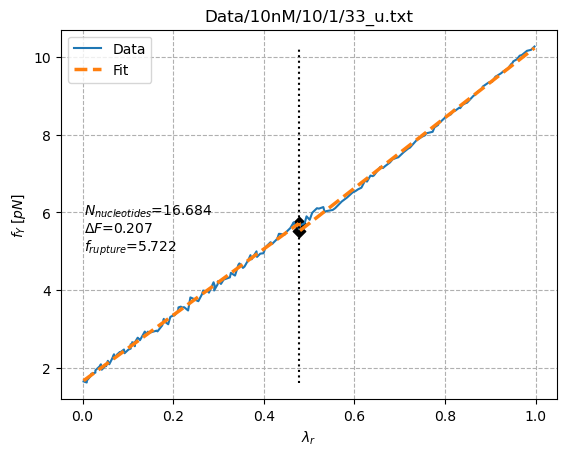

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   5.722113        5.514656  5.769419      16.684146  0.10596  0.478195   

     a_pre     b_pre    a_post    b_post  N_fits  
0  8.52789  1.644117  9.091737  1.167031       2  


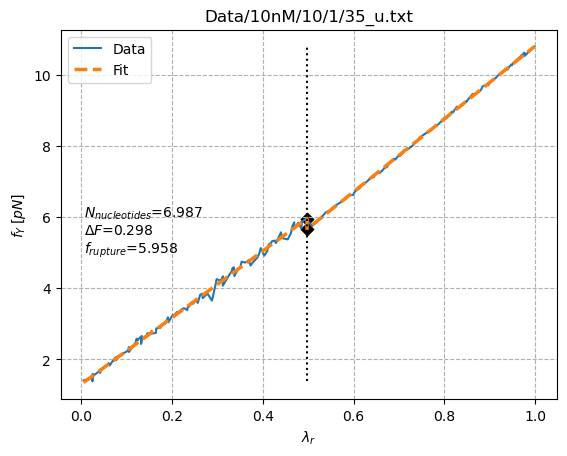

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   5.957561        5.659718  7.676368       6.987126  0.11182  0.497486   

      a_pre     b_pre     a_post    b_post  N_fits  
0  9.359458  1.301366  10.242008  0.564467       2  


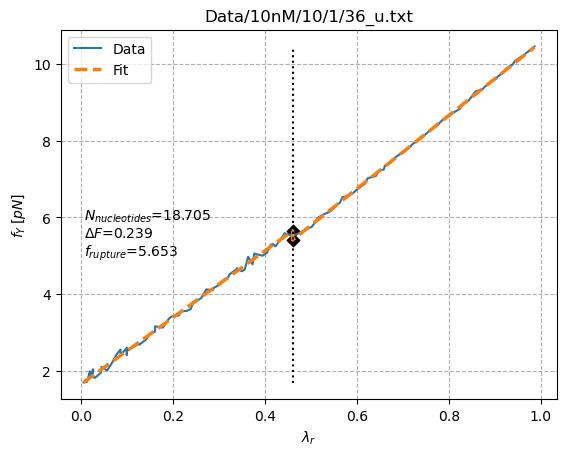

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   5.652582        5.413083  6.439126      18.704924  0.06299  0.460245   

      a_pre     b_pre    a_post    b_post  N_fits  
0  8.700132  1.648393  9.557231  1.014419       2  


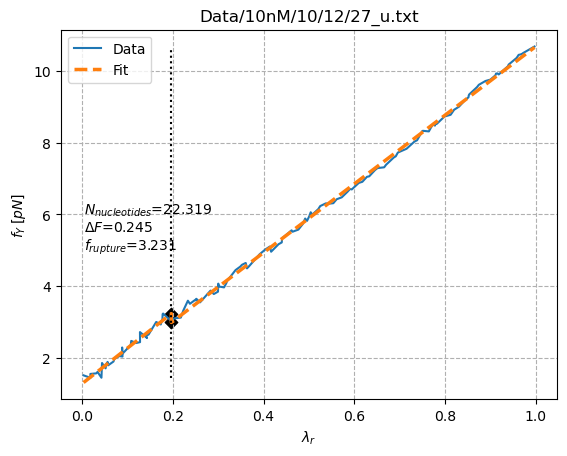

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   3.230688        2.985742  5.935544       22.31902  0.03906  0.196597   

      a_pre     b_pre   a_post    b_post  N_fits  
0  9.934518  1.277595  9.59174  1.100038       2  


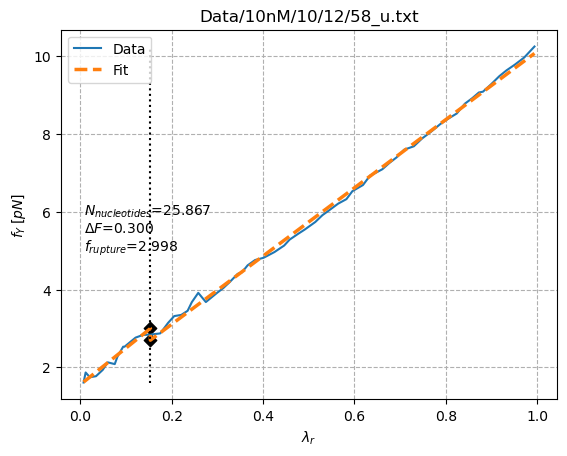

   f_rupture  f_rupture_next  x_ssDNA  N_nucleotides      t_0       λ_0  \
0   2.997942        2.697992   6.5915      25.866526  0.01368  0.153073   

      a_pre     b_pre    a_post    b_post  N_fits  
0  9.413106  1.557049  8.765212  1.356274       2  


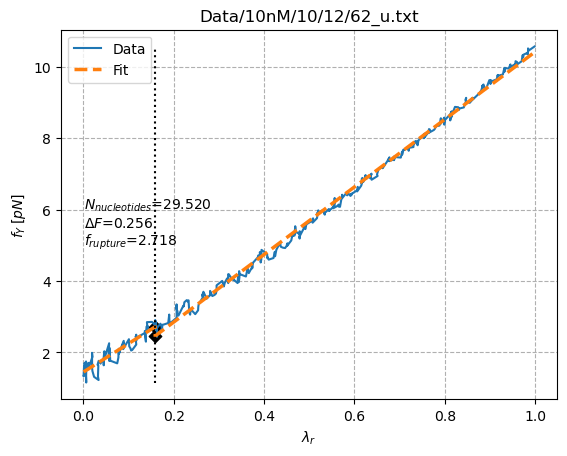

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   2.717976         2.46192  7.091993          29.52  0.08545  0.158964   

      a_pre     b_pre    a_post    b_post  N_fits  
0  7.980079  1.449429  9.470979  0.956373       2  


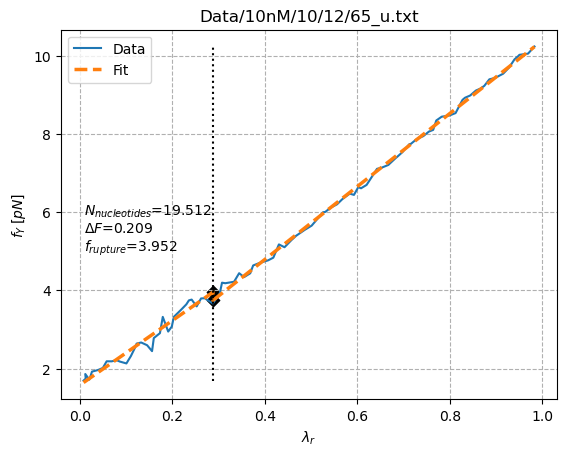

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides     t_0       λ_0  \
0   3.951727        3.742354  5.764686      19.511963  0.0376  0.287935   

      a_pre     b_pre    a_post    b_post  N_fits  
0  8.259248  1.573603  9.338495  1.053477       2  


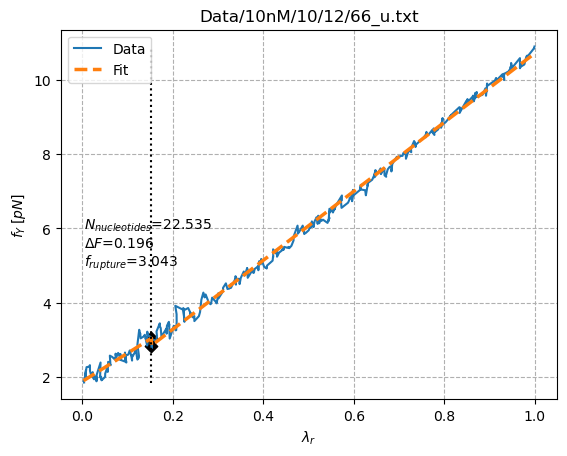

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   3.043197        2.847556  5.792841      22.535237  0.08838  0.152497   

      a_pre     b_pre    a_post    b_post  N_fits  
0  7.596543  1.884743  9.276572  1.432903       2  


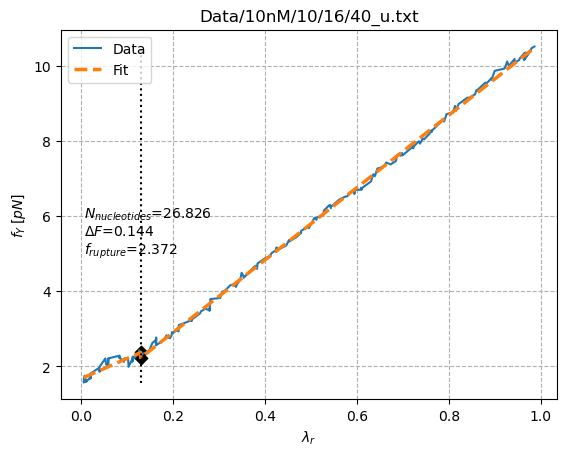

   f_rupture  f_rupture_next  x_ssDNA  N_nucleotides     t_0       λ_0  \
0   2.371777         2.22758  5.90577      26.825643  0.0361  0.129216   

      a_pre     b_pre    a_post    b_post  N_fits  
0  5.377913  1.676863  9.617388  0.984858       2  


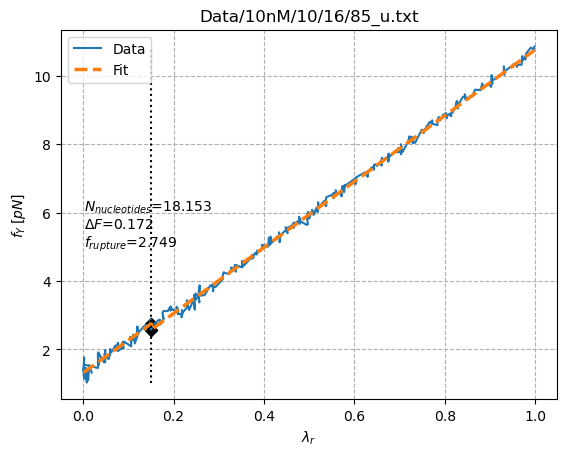

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   2.748691        2.576501  4.391459      18.153072  0.09018  0.150344   

      a_pre     b_pre    a_post    b_post  N_fits  
0  9.516893  1.317885  9.633998  1.128089       2  


In [37]:
for ii, element in enumerate(path_re_analyze_U):
    if ii <= fileNumb:
        continue
    number, N = element.split('/')[-2:]
    N, _ = N.split('_') 
    file = reading.readTxt(number=int(number), N=int(N), 
                           ty='u', forced_reshaped=0, 
                           graph=True)
    print(reading.params_df)
    
    avanti = input("Next: ")
    if avanti == "":
        continue
    else:
        fileNumb = ii
        break

In [38]:
fileNumb = -1

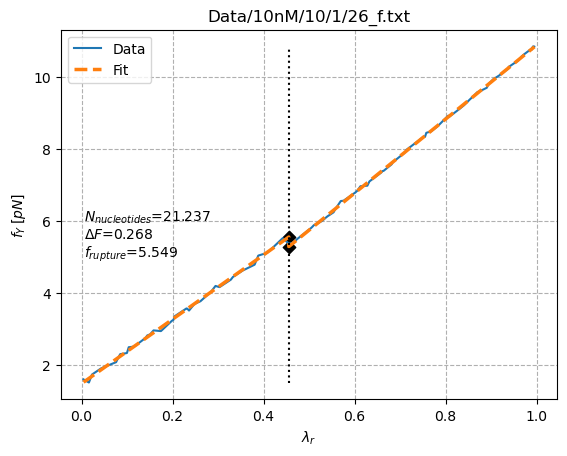

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0      λ_0  \
0   5.549258        5.281753  7.260678      21.237132  2.01318  0.45551   

      a_pre     b_pre     a_post    b_post  N_fits  
0  8.957748  1.468916  10.301063  0.589518       2  


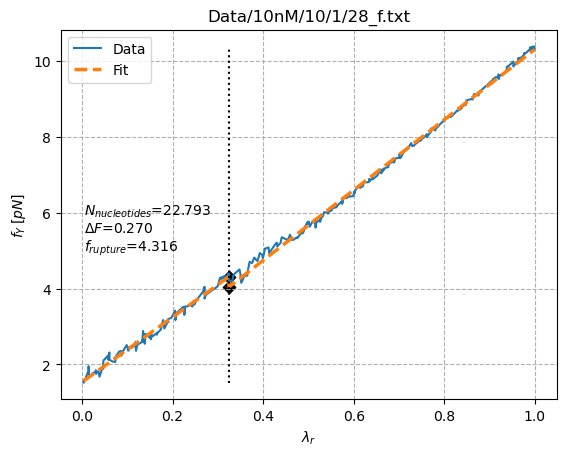

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   4.315946        4.046033  7.020005      22.793106  1.80224  0.324567   

      a_pre     b_pre    a_post    b_post  N_fits  
0  8.566933  1.535398  9.283781  1.032819       2  


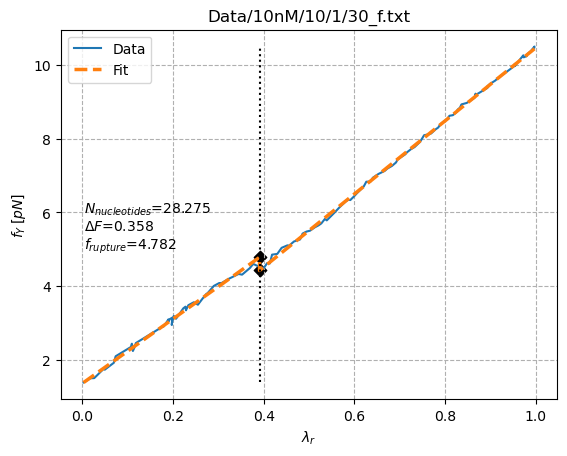

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0      λ_0  \
0    4.78179        4.424171  9.109542      28.274942  1.99365  0.39086   

      a_pre     b_pre    a_post   b_post  N_fits  
0  8.769925  1.353981  9.938634  0.53956       2  


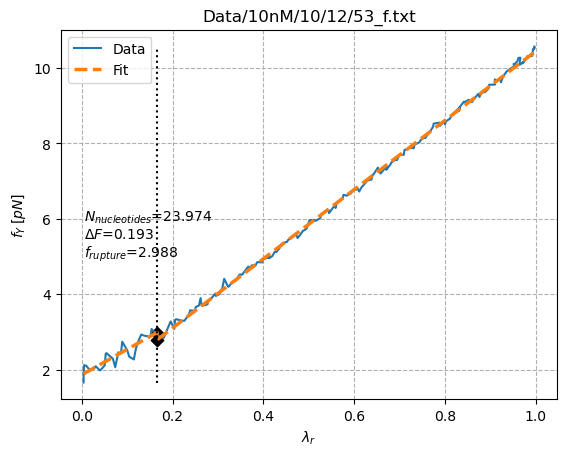

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   2.988018        2.795495  6.097514      23.974447  2.12354  0.165958   

      a_pre     b_pre    a_post    b_post  N_fits  
0  6.760906  1.865988  9.174278  1.272946       2  


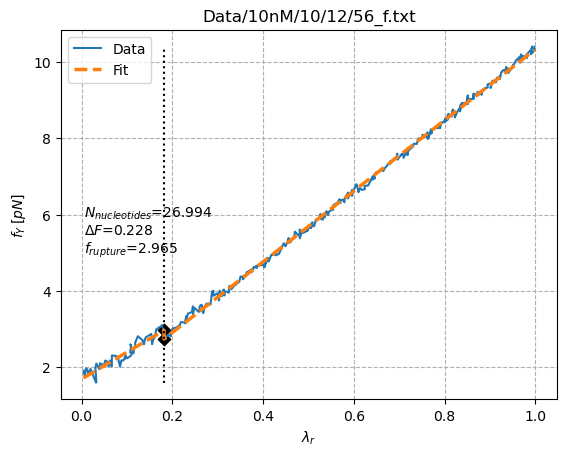

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   2.964635        2.737055  6.833938      26.994069  2.04248  0.181815   

      a_pre     b_pre    a_post    b_post  N_fits  
0  7.039475  1.684756  9.283474  1.049184       2  


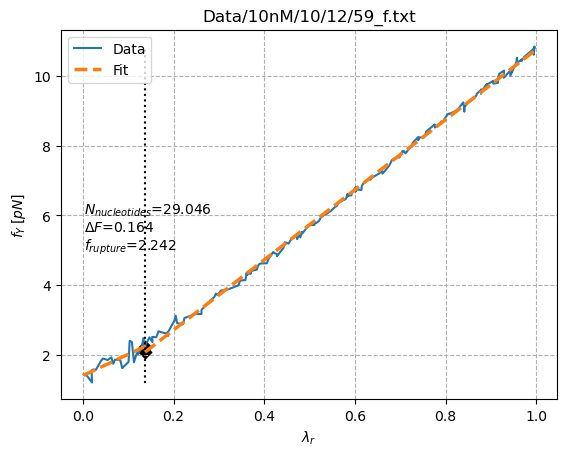

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   2.241553        2.077129  6.156314      29.046025  2.15772  0.136359   

      a_pre     b_pre     a_post    b_post  N_fits  
0  6.093672  1.410626  10.047073  0.707121       2  


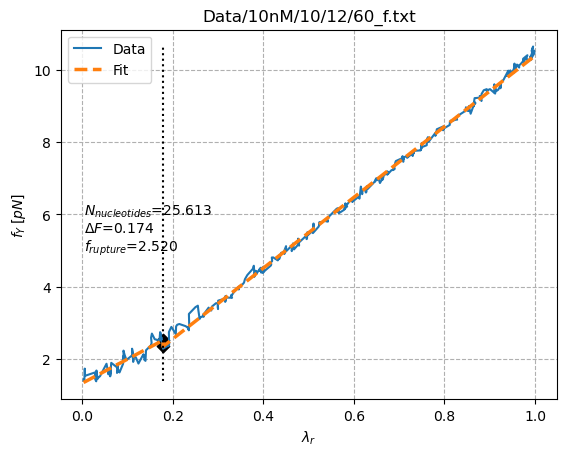

   f_rupture  f_rupture_next  x_ssDNA  N_nucleotides      t_0       λ_0  \
0   2.519729        2.345758  5.86618      25.612596  2.06982  0.178336   

      a_pre     b_pre    a_post    b_post  N_fits  
0  6.670864  1.330075  9.794438  0.599059       2  


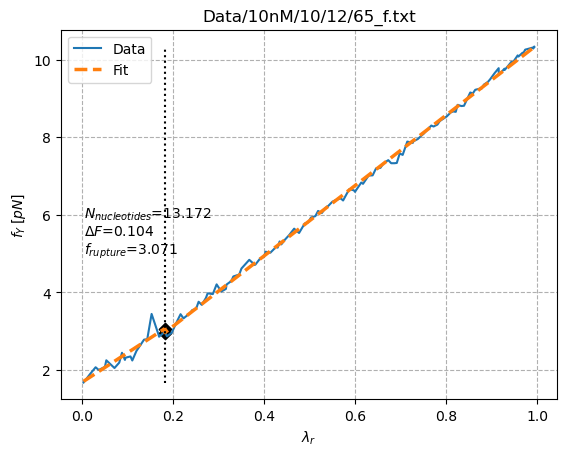

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   3.070807        2.966651  3.403778      13.172481  2.09082  0.182563   

      a_pre     b_pre    a_post    b_post  N_fits  
0  7.615009  1.680589  9.067504  1.311261       2  


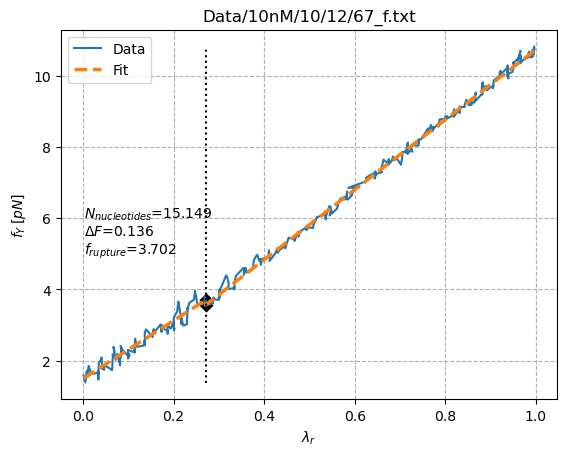

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0      λ_0  \
0   3.701638        3.565834  4.332269      15.149135  2.06397  0.27064   

      a_pre     b_pre    a_post    b_post  N_fits  
0  8.141447  1.498238  9.821194  0.907828       2  


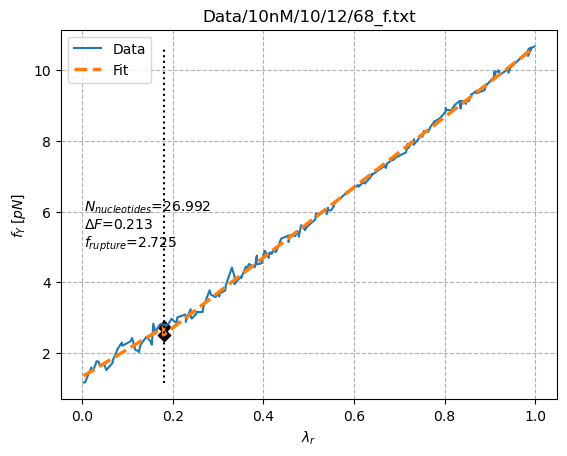

   f_rupture  f_rupture_next   x_ssDNA  N_nucleotides      t_0       λ_0  \
0   2.724574         2.51186  6.494333      26.991827  2.22754  0.179367   

      a_pre     b_pre    a_post    b_post  N_fits  
0  7.770403  1.330819  9.933742  0.730073       2  


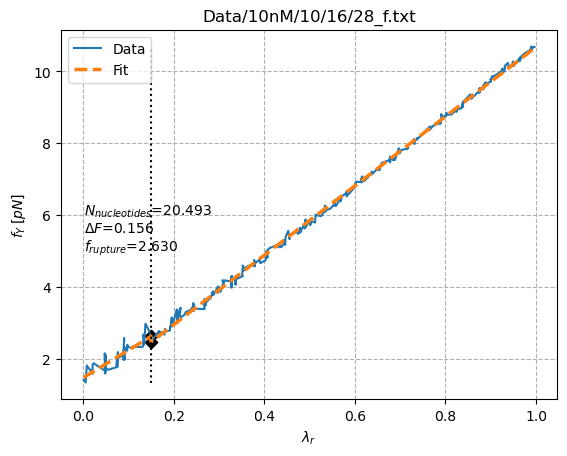

   f_rupture  f_rupture_next  x_ssDNA  N_nucleotides      t_0       λ_0  \
0   2.630038        2.474533  4.82329      20.492695  2.13825  0.149889   

     a_pre     b_pre    a_post    b_post  N_fits  
0  7.68518  1.478117  9.653846  1.027531       2  


In [39]:
for ii, element in enumerate(path_re_analyze_F):
    if ii <= fileNumb:
        continue
    number, N = element.split('/')[-2:]
    N, _ = N.split('_') 
    file = reading.readTxt(number=int(number), N=int(N), 
                           ty='f', forced_reshaped=0, 
                           graph=True)
    print(reading.params_df)
    
    avanti = input("Next: ")
    if avanti == "":
        continue
    else:
        fileNumb = ii
        break

In [ ]:
tot_numb_of_U = len([0 for dic in data.values() for sub_dic in dic['U'].values() if sub_dic['fileName'] in metaFile])
tot_numb_of_F = len([0 for dic in data.values() for sub_dic in dic['F'].values() if sub_dic['fileName'] in metaFile])
tot_numb_of_U, tot_numb_of_F

(473, 447)

In [10]:
λ = reading.file[1:, -1]
force_Y = np.abs(reading.file[1:, 2])

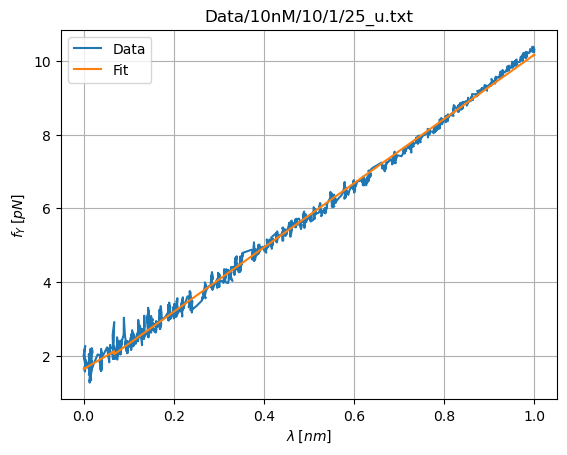

In [11]:
file = reading.readTxt(number=1, N=25, ty='u', graph=True)

In [12]:
reading.params_df

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,t_0,λ_0,a_pre,b_pre,a_post,b_post
0,2.9225,1.927,27.075179,107.854798,0.14112,0.067973,7.060215,1.651377,8.702596,1.461563


In [13]:
reading.k_eff

0.03794631498474971

In [14]:
reading.res_fold.head()

,Molecule,f,f_next,x_ssDNA,N_nucleotides,t_0
0,1.0,3.1415,2.5592,14.607945,55.801388,1.77197
1,1.0,2.6288,1.8374,14.105746,59.948790,5.10254
2,1.0,3.7255,3.2212,12.616548,43.973768,8.91699
3,1.0,3.4667,2.9424,13.049667,47.218937,13.14941
4,1.0,2.8429,2.1012,14.073551,56.995542,39.46777


In [15]:
reading.res_unfold.head()

,Molecule,f,f_next,x_ssDNA,N_nucleotides,t_0
0,1.0,5.7448,5.2370,12.030674,34.740219,-1.22559
1,1.0,4.2764,3.7289,13.357615,43.553846,18.50342
2,1.0,2.1759,1.4790,11.394746,54.869087,39.67676
3,1.0,2.2058,1.6151,10.392207,49.573499,43.78613
4,1.0,3.9578,3.2942,16.000406,54.116757,52.14404


In [16]:
# f_max = f_MAX[4]
# colors = ["#7afdd6","#77ff94","#a1e44d","#60993e","#613a3a", 
#             "#e3b505","#95190c","#610345","#107e7d","#044b7f"]
# markers = ["D", "o", "v", "^", "1", "8", "s", "p", "*", "x"]

# for m in range(len(molecules)):
#     col = colors[m]
#     for i in range(len(all_molecules_f[m])):
#         lab = f'Molecule {m}' if i == 0 else ''
#         f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_f[m][i][0]
#         plt.scatter(t_0, f_next, c=col, marker=markers[m], label=lab)
# plt.grid()
# plt.legend(loc='best')
# plt.title(f'f_MAX = {f_max} -- Fold')
# # plt.xscale('log')
# plt.xlabel('Time [s]')
# plt.ylabel('$f_{rupture} \\:[pN]$')
# plt.show()

In [17]:
# Create folder for images
images_path = f'imgs/{folder}/{f_max}'
isExist = os.path.exists(images_path)
if not isExist:
    os.makedirs(images_path)
    print("The images directory is created...")

The images directory is created...


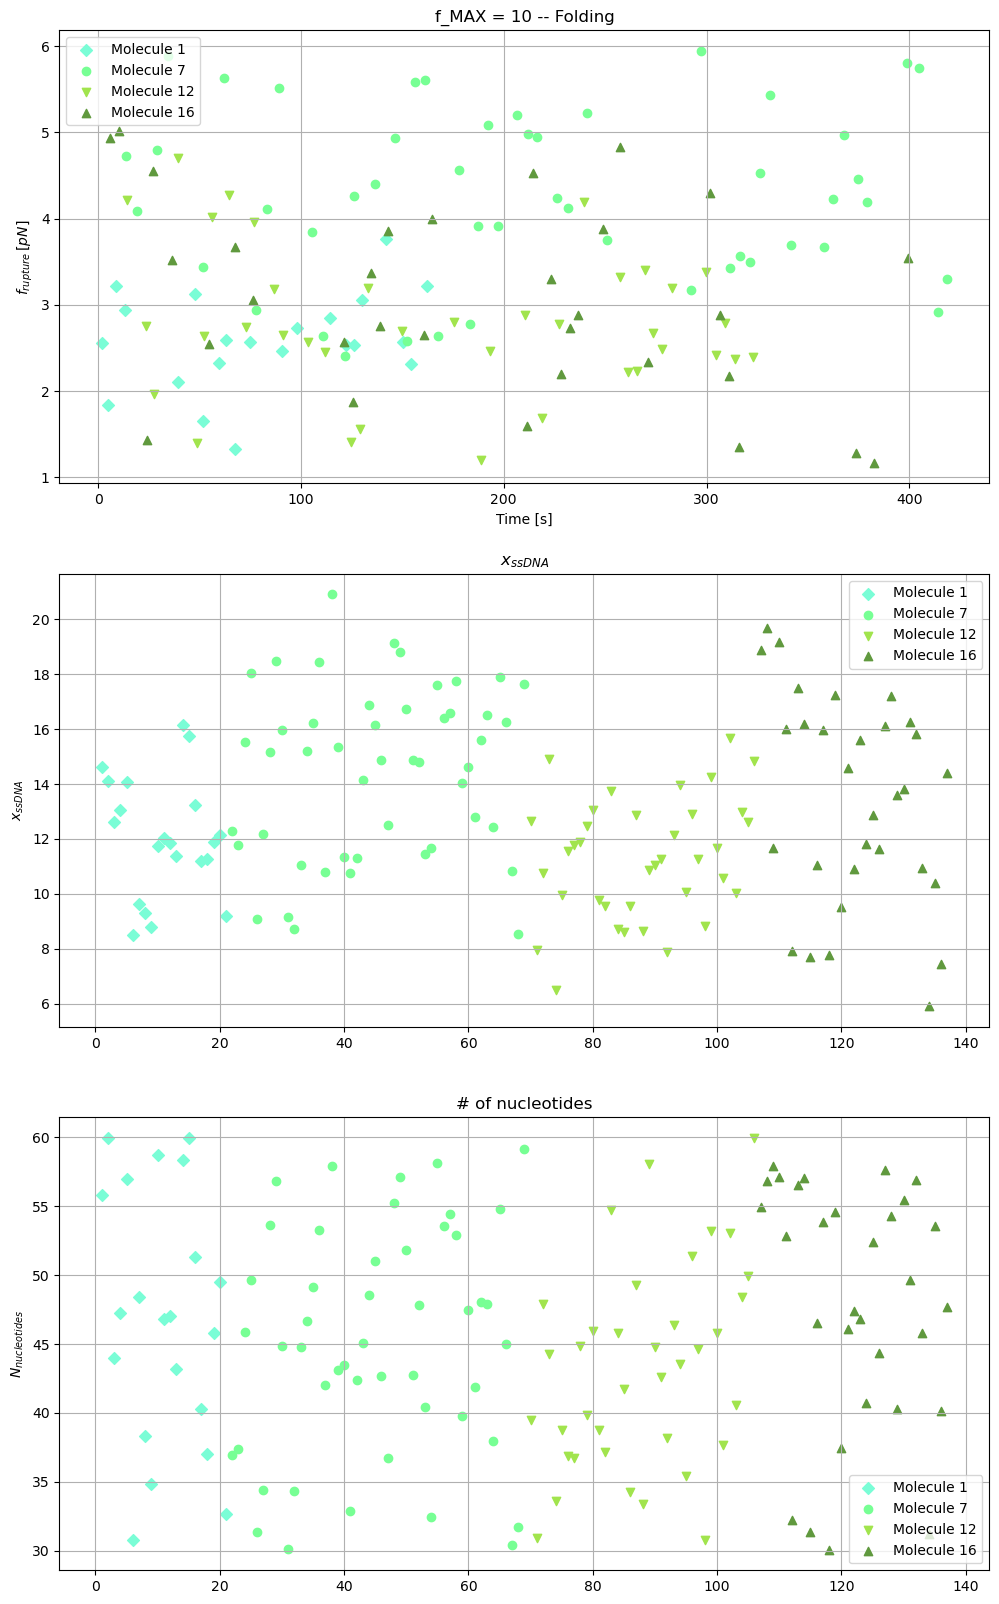

In [18]:
colors = ["#7afdd6","#77ff94","#a1e44d","#60993e","#613a3a", 
            "#e3b505","#95190c","#610345","#107e7d","#044b7f", 
            "#20bf55","#0b4f6c","#01baef","#fbfbff","#757575"]
markers = ["D", "o", "v", "^", "1", "8", "s", "p", "*", "x", 
           "d", "|", "_", "4", "P"]

fig, ax = plt.subplots(3, figsize=(12, 20))
g = 0

for m in range(len(molecules)):
    col = colors[m]
    for i in range(len(all_molecules_f[m])):
        g += 1
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_f[m][i][0]
        ax[0].scatter(t_0, f_next, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)

ax[0].grid()
ax[0].legend(loc='best')
ax[0].set_title(f'f_MAX = {f_max} -- Folding')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

ax[1].grid()
ax[1].legend()
ax[1].set_title('$x_{ssDNA}$')
ax[1].set_ylabel('$x_{ssDNA}$')

ax[2].grid()
ax[2].legend()
ax[2].set_title('# of nucleotides')
ax[2].set_ylabel('$N_{nucleotides}$')

plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Folding.png', dpi=300, bbox_inches='tight')
plt.show()

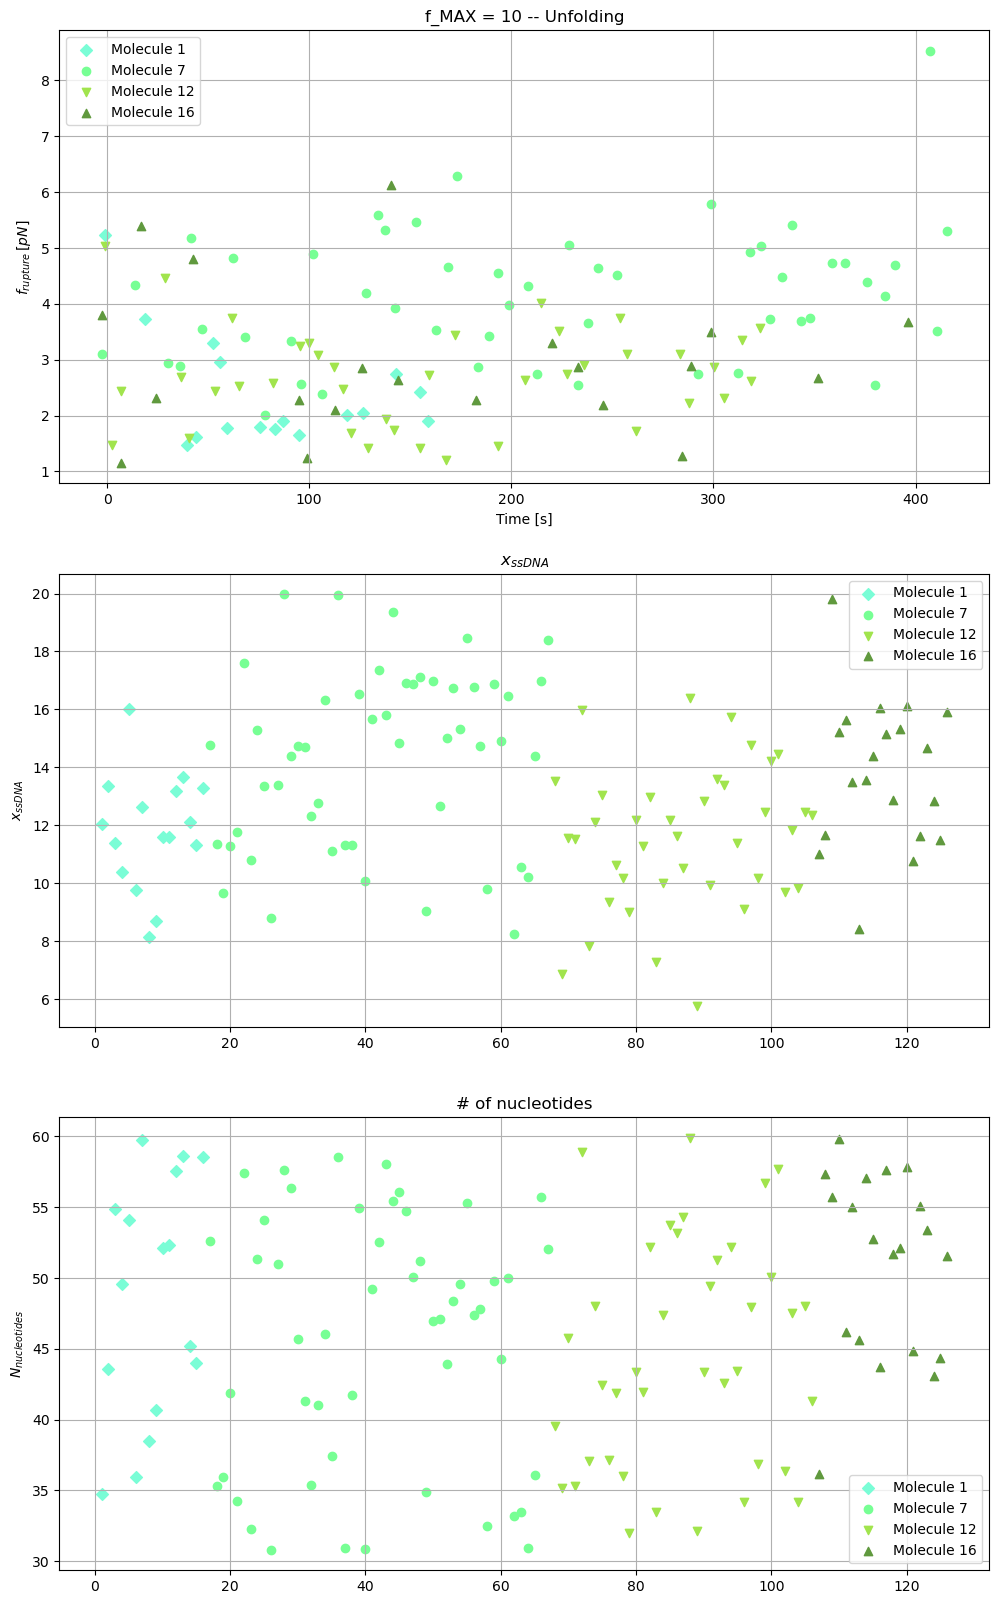

In [19]:
fig, ax = plt.subplots(3, figsize=(12, 20))
g = 0

for m in range(len(molecules)):
    col = colors[m]
    for i in range(len(all_molecules_u[m])):
        g += 1
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_u[m][i][0]
        ax[0].scatter(t_0, f_next, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)

ax[0].grid()
ax[0].legend(loc='best')
ax[0].set_title(f'f_MAX = {f_max} -- Unfolding')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

ax[1].grid()
ax[1].legend()
ax[1].set_title('$x_{ssDNA}$')
ax[1].set_ylabel('$x_{ssDNA}$')

ax[2].grid()
ax[2].legend()
ax[2].set_title('# of nucleotides')
ax[2].set_ylabel('$N_{nucleotides}$')

plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Unfolding.png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
# Plots per single molecule

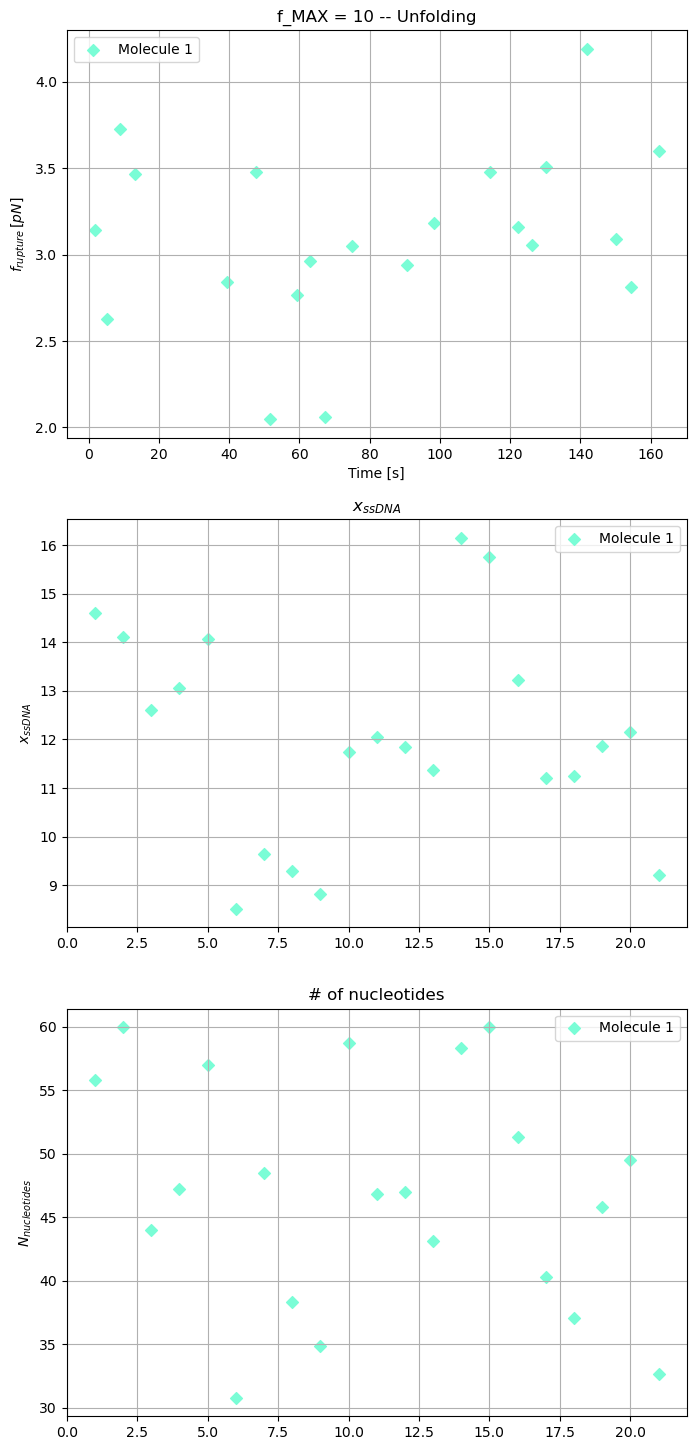

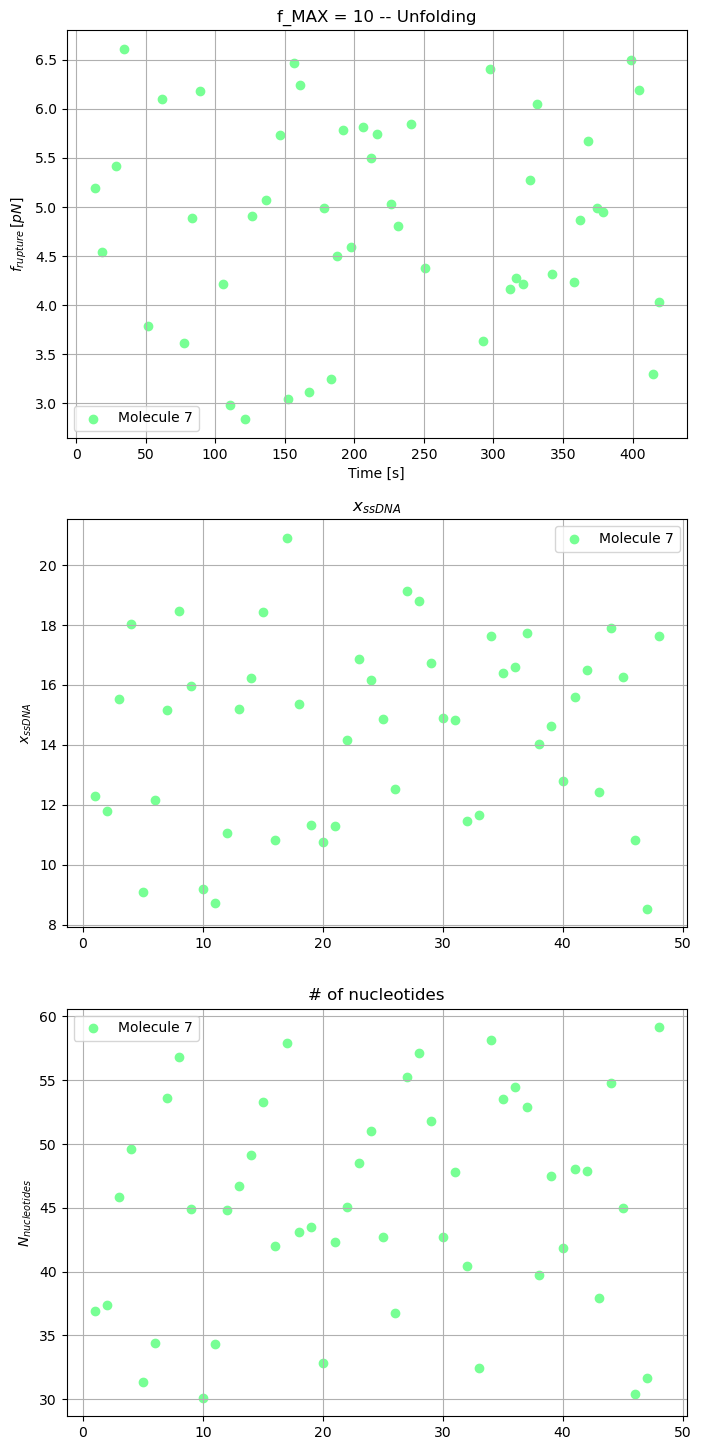

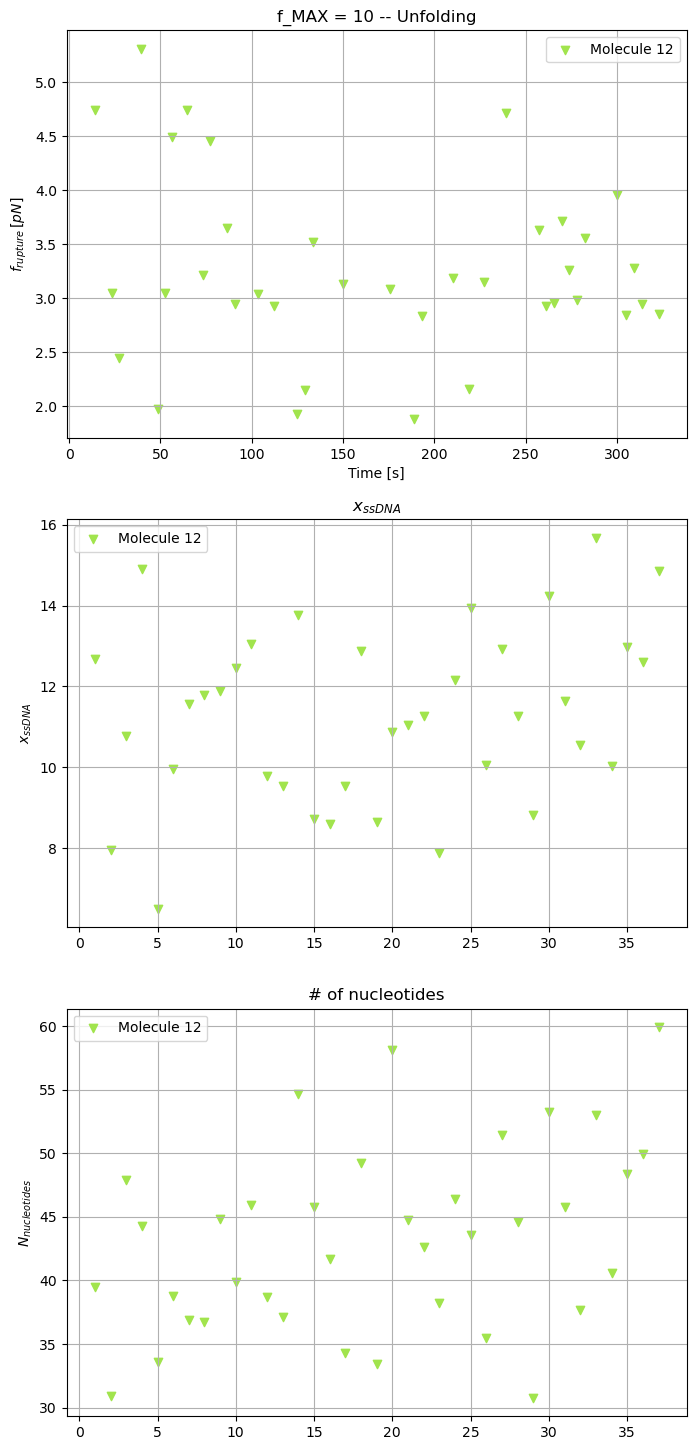

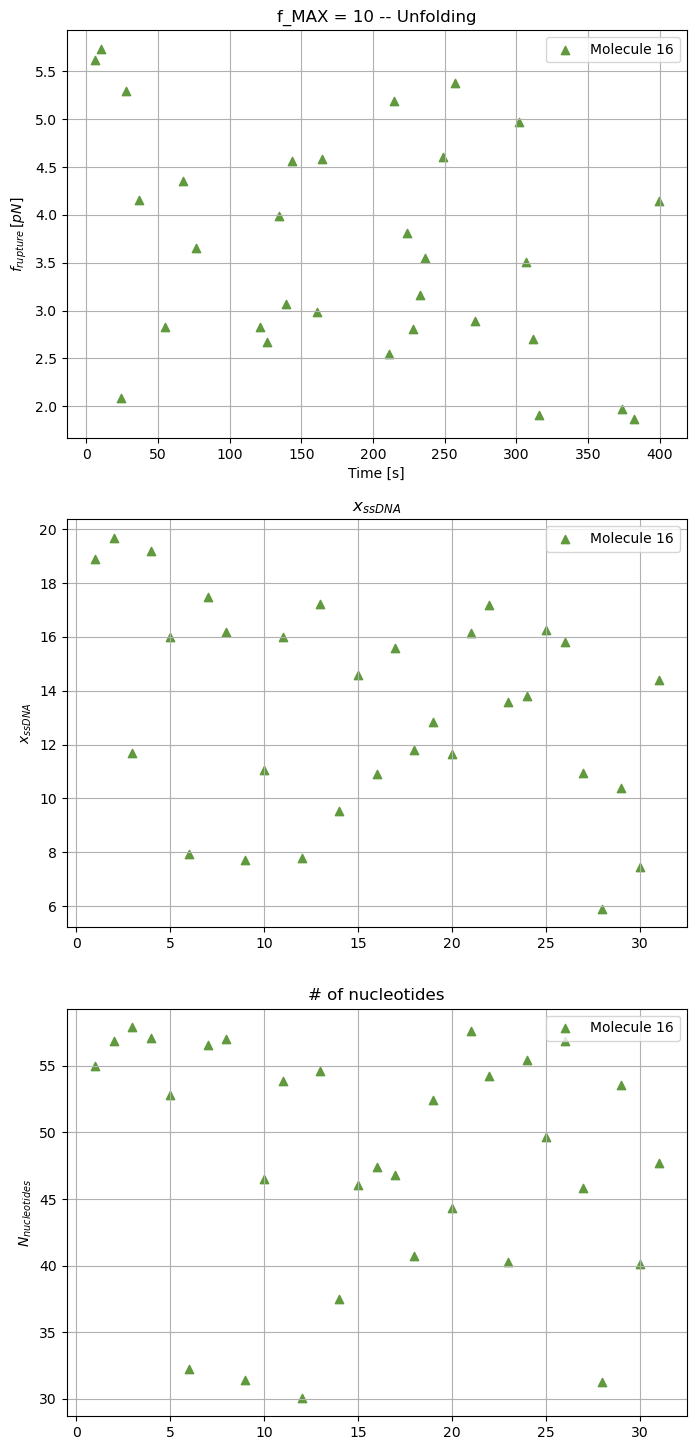

In [21]:
for m in range(len(molecules)):
    fig, ax = plt.subplots(3, figsize=(8, 18))
    col = colors[m]
    g = 0
    for i in range(len(all_molecules_f[m])):
        g += 1 
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_f[m][i][0]
        ax[0].scatter(t_0, f, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)
    ax[0].grid()
    ax[0].legend(loc='best')
    ax[0].set_title(f'f_MAX = {f_max} -- Unfolding')
    ax[0].set_xlabel('Time [s]')
    ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

    ax[1].grid()
    ax[1].legend()
    ax[1].set_title('$x_{ssDNA}$')
    ax[1].set_ylabel('$x_{ssDNA}$')

    ax[2].grid()
    ax[2].legend()
    ax[2].set_title('# of nucleotides')
    ax[2].set_ylabel('$N_{nucleotides}$')
    plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Folding_Molecule{molecules[m]}.png', dpi=300, bbox_inches='tight')
    plt.show()

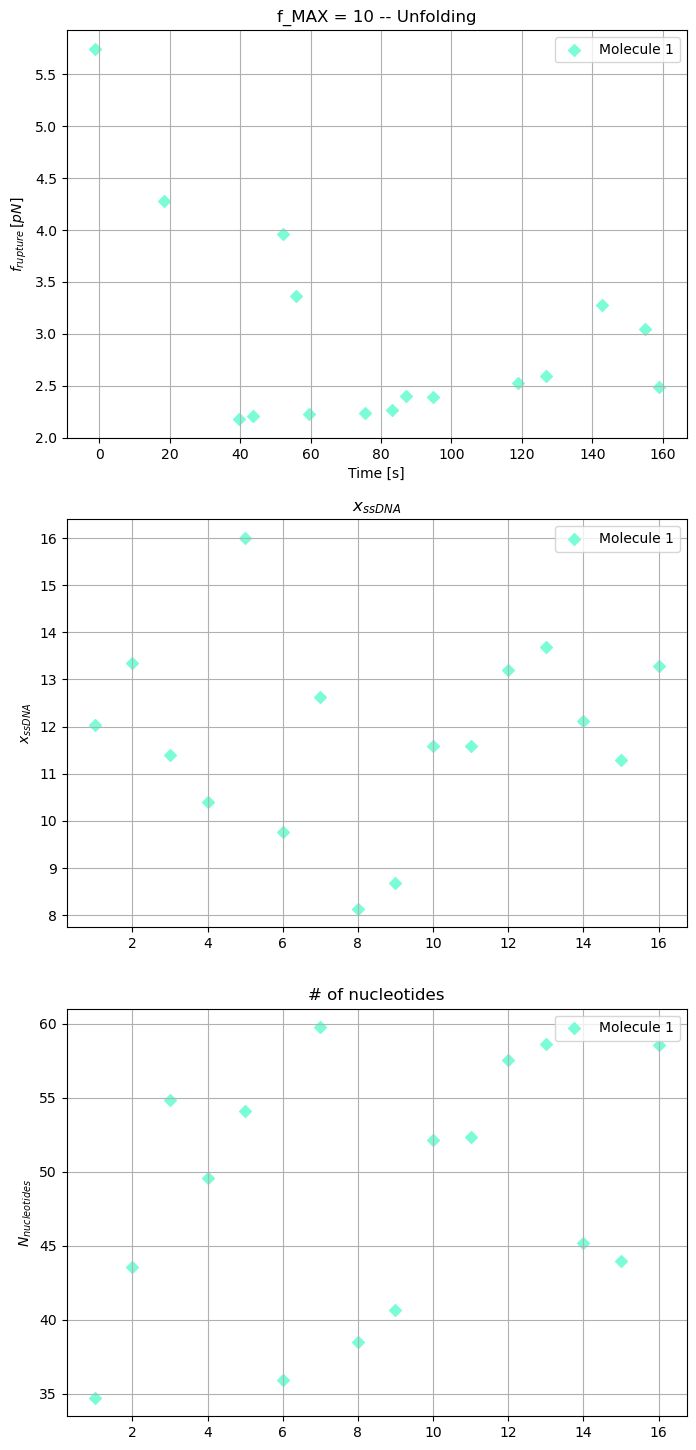

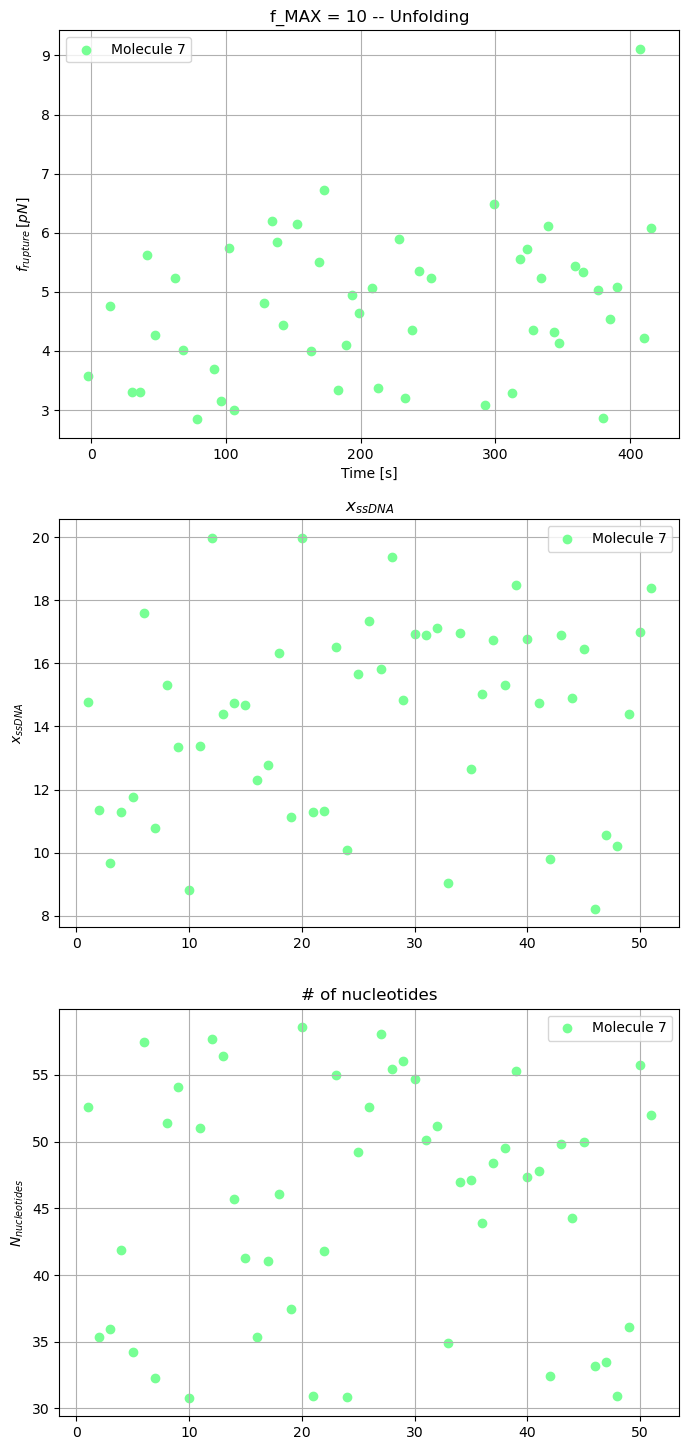

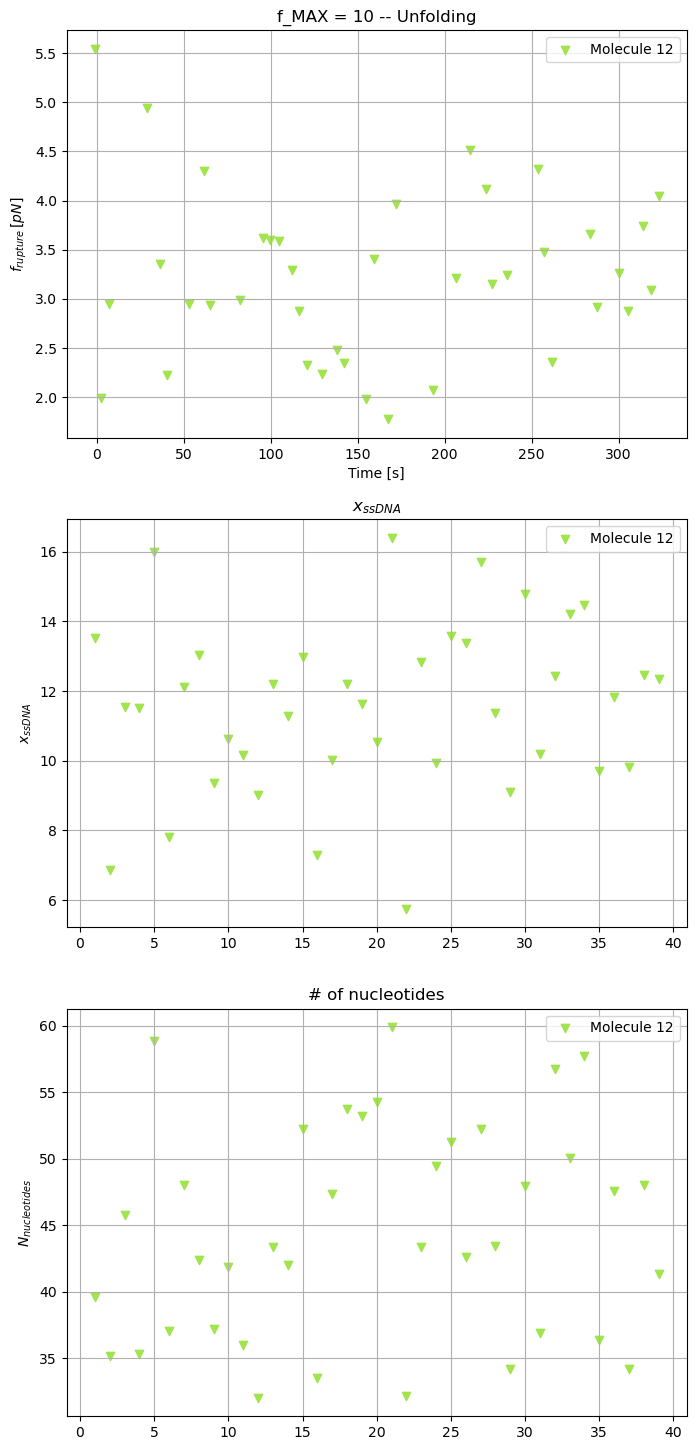

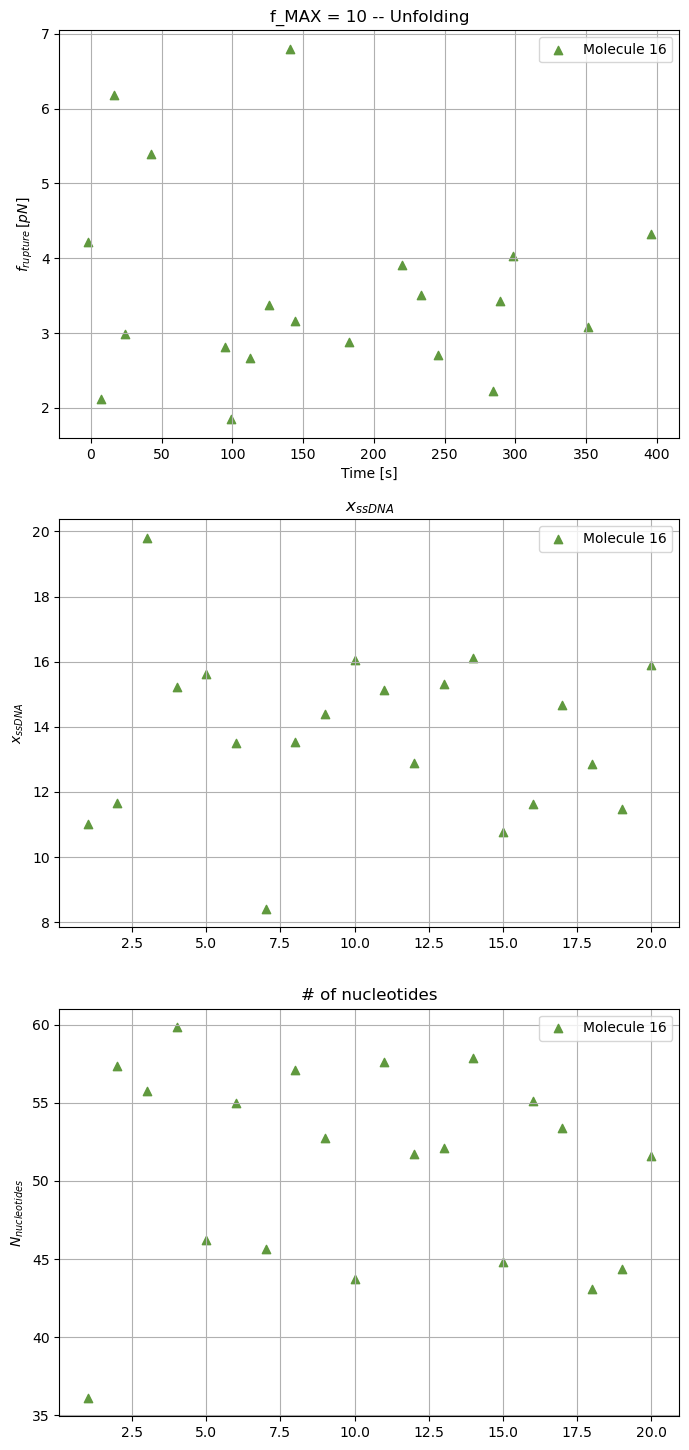

In [22]:
for m in range(len(molecules)):
    fig, ax = plt.subplots(3, figsize=(8, 18))
    col = colors[m]
    g = 0
    for i in range(len(all_molecules_u[m])):
        g += 1 
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_u[m][i][0]
        ax[0].scatter(t_0, f, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)
    ax[0].grid()
    ax[0].legend(loc='best')
    ax[0].set_title(f'f_MAX = {f_max} -- Unfolding')
    ax[0].set_xlabel('Time [s]')
    ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

    ax[1].grid()
    ax[1].legend()
    ax[1].set_title('$x_{ssDNA}$')
    ax[1].set_ylabel('$x_{ssDNA}$')

    ax[2].grid()
    ax[2].legend()
    ax[2].set_title('# of nucleotides')
    ax[2].set_ylabel('$N_{nucleotides}$')
    plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Unfolding_Molecule{molecules[m]}.png', dpi=300, bbox_inches='tight')
    plt.show()